<center>Machine Learning  Project - Intermediate Level </center>

## <center> Drug  Prediction  Project </center>

- The current process suffers from the following problems:

- Testing phase takes a lot of time and it's done manually because they need to carefully examine each person for the side effects.
- Most of the crucial time is being wasted in checking each person’s health report and dispensing specific drugs according to the health metric as suggested by the R&D team.
- This process is time-consuming and wastage of resources.

- The company has hired you as data science consultants. They want to automate the process of assigning the drug according to their health report.

- Your Role
You are given a dataset containing the health report of the people from the test group.
Your task is to build a multi-class classification model using the dataset.
Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.

- Project Deliverables
Deliverable: Drug classification.
Machine Learning Task: Multi-class classification
Target Variable: Drug
Win Condition: N/A (best possible model)

Evaluation Metric
The model evaluation will be based on the Accuracy Score.
To learn about F1 Score’s Python implementation, please visit this link.

- The dataset contains all the necessary information about the person’s health like their sex, BP, Age, Cholesterol etc.

- We have the health metrics of the person which is an essential factor for transcribing the drug to that person without any side effect.

- This is the data that we have to predict for future samples.


- The dataset is divided into two parts: Train, and Test sets.

- Train Set:
The train set contains 160 rows and 7 columns.
The last column Drug is the target variable.

- Test Set:
The test set contains 40 rows and 6 columns.
The test set doesn’t contain the Drug column.
It needs to be predicted for the test set.

In [1]:
import pandas as pd                                                
pd.set_option('display.max_columns', None)                          
pd.set_option('display.max_colwidth', None)                         
pd.set_option('display.max_rows', None)                             
pd.set_option('mode.chained_assignment', None)                      
# To suppress scientific notation over exponential values
#pd.set_option('display.float_format', lambda x: '%.5f' % x)        
import numpy as np                                                  
import matplotlib.pyplot as plt                                     
import seaborn as sns                                               
import plotly.graph_objs as go                                      
%matplotlib inline                                       

import warnings                                                     
warnings.filterwarnings("ignore")                                   

In [2]:
import sklearn.metrics
from sklearn.preprocessing import StandardScaler                    
from sklearn.model_selection import train_test_split                
from sklearn.ensemble import RandomForestRegressor                  
from sklearn.linear_model import LinearRegression       
from random import randint                                          

In [3]:
from sklearn.linear_model import LogisticRegression    
from sklearn import metrics
from sklearn.metrics import accuracy_score                          
from sklearn.metrics import precision_score                         
from sklearn.metrics import recall_score                            
from sklearn.metrics import precision_recall_curve                  
from sklearn.metrics import confusion_matrix                        
from sklearn.metrics import f1_score                                
from sklearn.metrics import roc_curve                                              
from sklearn.metrics import classification_report

In [4]:
drugtrain = pd.read_csv(filepath_or_buffer = "drug_train.csv")
drugtest = pd.read_csv(filepath_or_buffer = "drug_test.csv")

In [5]:
print('Shape of the training dataset:', drugtrain.shape)
print('Shape of the testing dataset:', drugtest.shape)

Shape of the training dataset: (160, 7)
Shape of the testing dataset: (40, 6)


In [6]:
drugtrain.head()

,Id,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,79,32,F,LOW,NORMAL,10.840,drugX
1,197,52,M,NORMAL,HIGH,9.894,drugX
2,38,39,F,NORMAL,NORMAL,9.709,drugX
3,24,33,F,LOW,HIGH,33.486,DrugY
4,122,34,M,NORMAL,HIGH,22.456,DrugY


In [7]:
# Only for columns of train data set
drugtrain.columns = drugtrain.columns.str.lower().str.replace(' ', '_')
# Only for columns of test data set
drugtest.columns = drugtest.columns.str.lower().str.replace(' ', '_')

In [8]:
drugtrain.set_index("id", inplace = True)
drugtest.set_index("id", inplace = True)

In [9]:
obj_columns = list(drugtrain.dtypes[drugtrain.dtypes == 'object'].index)
obj_columns

['sex', 'bp', 'cholesterol', 'drug']

In [10]:
drugtrain['drug'].replace('DrugY', 'drugY', inplace = True)

In [11]:
drugtrain.describe()

,age,na_to_k
count,160.000000,160.000000
mean,45.387500,16.194988
std,16.101481,7.254689
min,15.000000,6.269000
25%,32.000000,10.445250
50%,46.000000,14.076500
75%,58.250000,19.480750
max,74.000000,38.247000


In [12]:
for cols in drugtrain.columns:
    print("cols",cols, "unique",  drugtrain[cols].nunique())   
    

cols age unique 53
cols sex unique 2
cols bp unique 3
cols cholesterol unique 2
cols na_to_k unique 159
cols drug unique 5


In [13]:
#categorical = ['sex', 'bp ', 'drug','cholesterol']
#numerical = ['age', 'na_to_k']

In [14]:
#drugtrain[categorica1].unique()

In [15]:
drugtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 79 to 102
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          160 non-null    int64  
 1   sex          160 non-null    object 
 2   bp           160 non-null    object 
 3   cholesterol  160 non-null    object 
 4   na_to_k      160 non-null    float64
 5   drug         160 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 8.8+ KB


# Preprocessing Data

- Dealing with missing values<br/>
   

In [16]:
drugtrain.isnull().sum().any()

False

In [17]:
drugtest.isnull().sum().any()

False

In [18]:
print('Do Training data have any duplicate Rows ?', drugtrain.duplicated().any())
print('Do TESTING data have any duplicate Rows ?', drugtest.duplicated().any())

Do Training data have any duplicate Rows ? False
Do TESTING data have any duplicate Rows ? False


- Observations </br> 
- There are no duplicate rows in the  data found
- There are **no missing values** present in the dataset.

# EDA

In [19]:
drugtrain.drug.value_counts(normalize= True)

drugY    0.47500
drugX    0.26875
drugA    0.10625
drugB    0.08125
drugC    0.06875
Name: drug, dtype: float64

<AxesSubplot:>

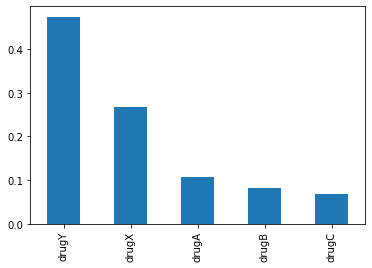

In [20]:
drugtrain.drug.value_counts(normalize= True).plot(kind='bar')

sex
F    AxesSubplot(0.125,0.125;0.775x0.755)
M    AxesSubplot(0.125,0.125;0.775x0.755)
Name: na_to_k, dtype: object

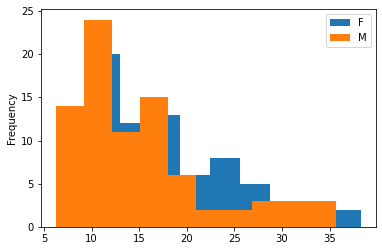

In [21]:
drugtrain.groupby(['sex'])['na_to_k'].plot(kind='hist',legend=True)

In [22]:
drugtrain.sex.value_counts()

M    83
F    77
Name: sex, dtype: int64

In [23]:
drugtrain.drug.value_counts()

drugY    76
drugX    43
drugA    17
drugB    13
drugC    11
Name: drug, dtype: int64

<AxesSubplot:ylabel='drug'>

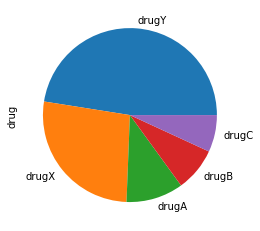

In [24]:
drugtrain.drug.value_counts().plot(kind='pie')

In [25]:
temp_drug = drugtrain.groupby(['drug'], as_index=False)[['age','na_to_k']].max().sort_values(by='drug', ascending = False)
trans_drug = temp_drug.rename(columns = {'drug':'Drug Max monthwise'})
trans_drug.head(10)

,Drug Max monthwise,age,na_to_k
4,drugY,74,38.247
3,drugX,72,14.642
2,drugC,72,13.127
1,drugB,74,14.239
0,drugA,50,13.972


In [26]:
drugtrain.groupby(['drug'], as_index=False)[['age','na_to_k']].aggregate(['min', np.median, max]).sort_values(by='drug', ascending = False)

age            na_to_k                 
      min median max     min   median     max
drug                                         
drugY  15   44.0  74  15.015  19.9045  38.247
drugX  15   45.0  72   6.683  10.1030  14.642
drugC  16   47.0  72   6.769  11.0370  13.127
drugB  51   60.0  74   8.621  11.0090  14.239
drugA  20   37.0  50   6.269  10.4460  13.972

In [27]:
drugtrain.groupby(['sex'], as_index=False)[['age','na_to_k']].aggregate(['min', np.median, max]).sort_values(by='sex', ascending = False)

age            na_to_k                
    min median max     min  median     max
sex                                       
M    15   47.0  74   6.269  13.934  35.639
F    15   41.0  74   6.683  15.891  38.247

- What is the distribution of age ?

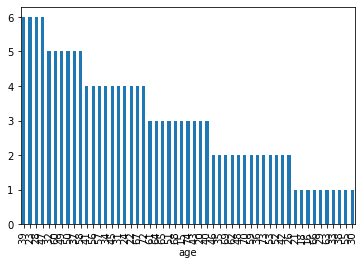

In [28]:
drugtrain.groupby(['age'])['age'].count().sort_values(ascending=False).plot(kind='bar');

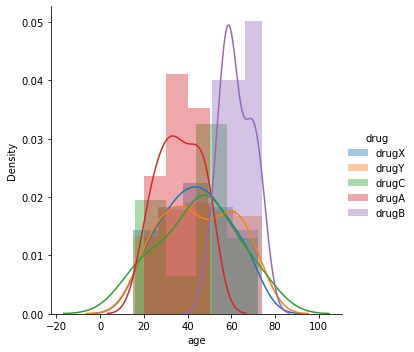

In [29]:
sns.FacetGrid(drugtrain, hue = 'drug', size = 5).map(sns.distplot,'age').add_legend()

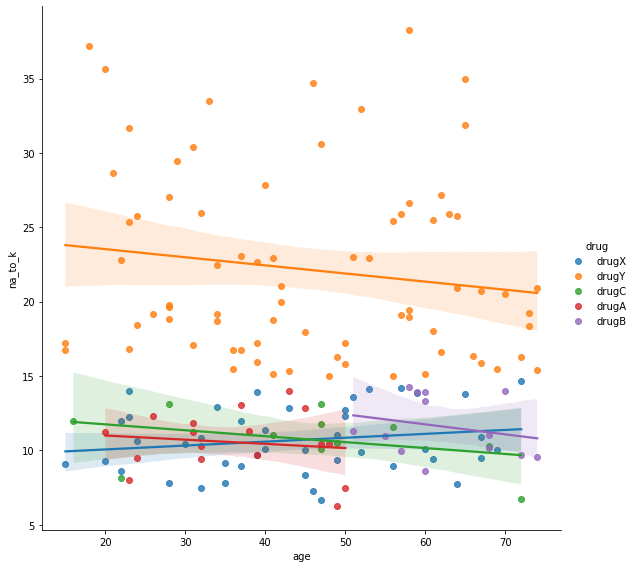

In [30]:
sns.lmplot(x="age", y="na_to_k", hue="drug", data=drugtrain, size=8)

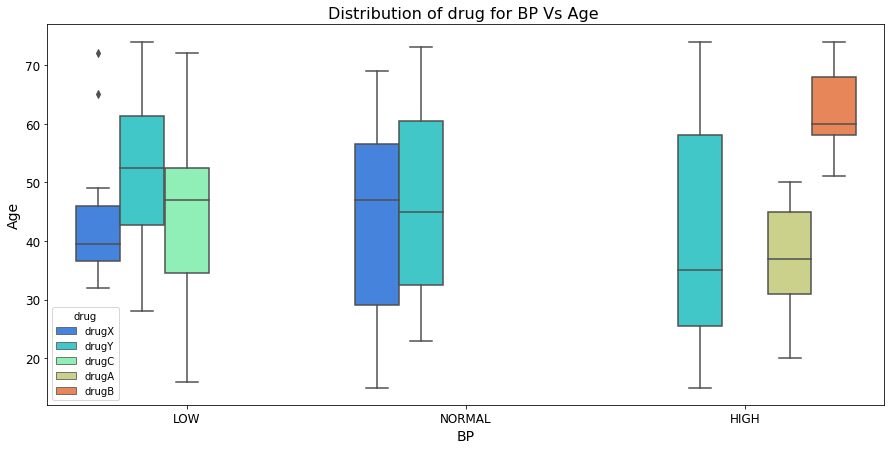

In [31]:
# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[15, 7])
sns.boxplot(x='bp', y='age', palette='rainbow', hue='drug', data=drugtrain)
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='BP', size=14)
plt.ylabel(ylabel='Age', size=14)
plt.title(label='Distribution of drug for BP Vs Age ', size=16)
plt.show()

- What is the distribution pattern of sodium to potassium ration Vs bp ?

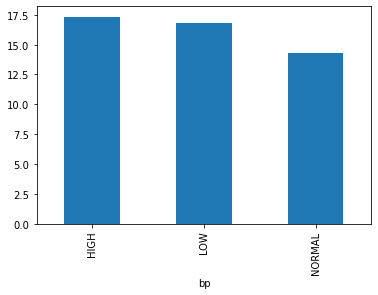

In [32]:
(drugtrain.groupby(['bp'])['na_to_k'].sum()/drugtrain.groupby(['bp'])['na_to_k'].count()).plot(kind='bar');

What is the bp distribution among age ?

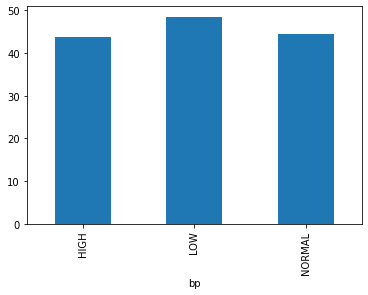

In [33]:
(drugtrain.groupby(['bp'])['age'].sum()/drugtrain.groupby(['bp'])['age'].count()).plot(kind='bar');

### Observations 
- High BP as well normal bp is observed till the age of  45.
- Low BP is seen for ages upto 49 years.

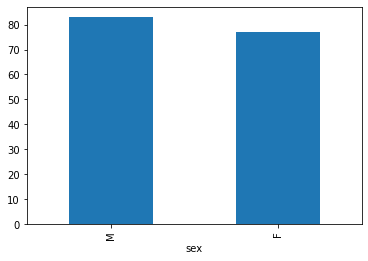

In [34]:
drugtrain.groupby(['sex'])['bp'].count().sort_values(ascending=False).plot(kind='bar');

- What is the distribution of male and female?

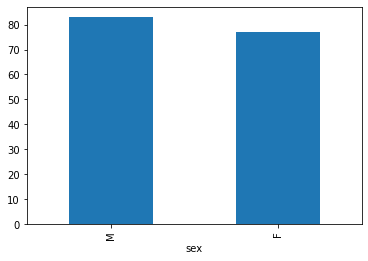

In [35]:

drugtrain.groupby(['sex'])['sex'].count().sort_values(ascending=False).plot(kind='bar');

- What is the distribution of cholesterol ?

<AxesSubplot:xlabel='cholesterol'>

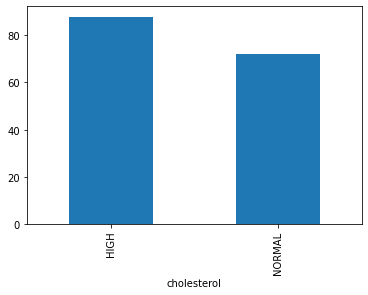

In [36]:
drugtrain.groupby(['cholesterol'])['cholesterol'].count().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='age', ylabel='na_to_k'>

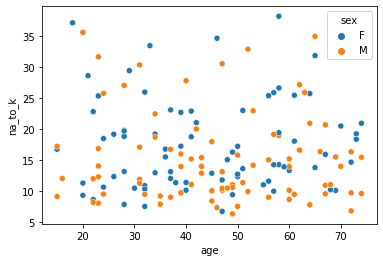

In [37]:
sns.scatterplot(data = drugtrain, x = 'age', y = 'na_to_k', hue = 'sex')

In [38]:
drugtrain.describe()

,age,na_to_k
count,160.000000,160.000000
mean,45.387500,16.194988
std,16.101481,7.254689
min,15.000000,6.269000
25%,32.000000,10.445250
50%,46.000000,14.076500
75%,58.250000,19.480750
max,74.000000,38.247000


<AxesSubplot:ylabel='Density'>

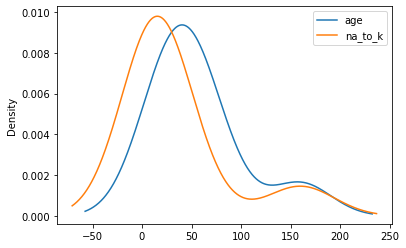

In [39]:
drugtrain.describe().plot(kind='kde')

Text(0.5, 1.0, 'Pair Plot')

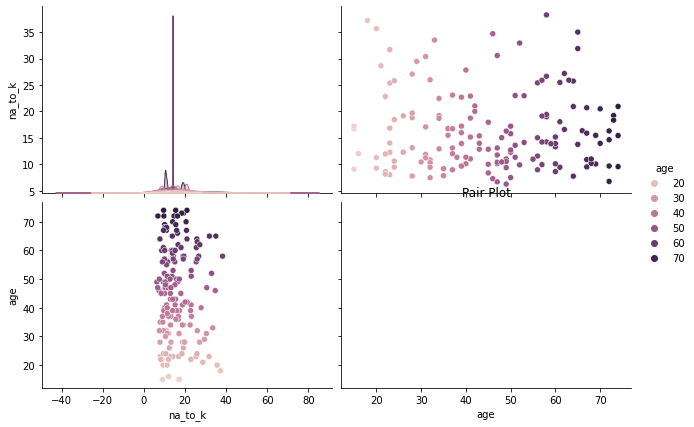

In [40]:
sns.pairplot(drugtrain[["na_to_k","age"]],vars = ["na_to_k","age"],\
                                                             hue="age", dropna=True, height = 3, aspect = 1.5)
plt.title('Pair Plot')

<AxesSubplot:ylabel='Frequency'>

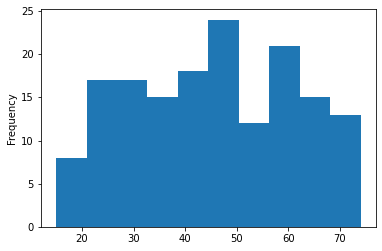

In [41]:
drugtrain.age.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

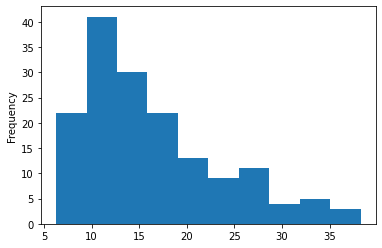

In [42]:
drugtrain.na_to_k.plot(kind='hist')

In [43]:
drugtrain.columns

Index(['age', 'sex', 'bp', 'cholesterol', 'na_to_k', 'drug'], dtype='object')

In [44]:
nf_cust = drugtrain.select_dtypes(exclude='object')
nf_list = nf_cust.columns.tolist()
print(nf_list)
print(len(nf_list))

['age', 'na_to_k']
2


In [45]:
cf_cust = drugtrain.select_dtypes(include='object')
cf_list = cf_cust.columns.tolist()
#cf_cust = cc_train_data2.select_dtypes(include=[np.object]).columns
print(cf_list)
print(len(cf_list))

['sex', 'bp', 'cholesterol', 'drug']
4


<AxesSubplot:xlabel='age', ylabel='na_to_k'>

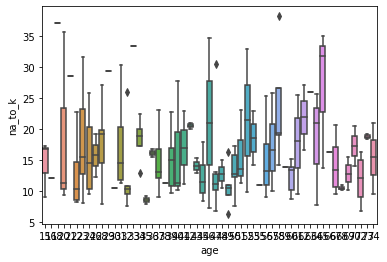

In [46]:
sns.boxplot(data = drugtrain, x = "age", y ="na_to_k")

<AxesSubplot:>

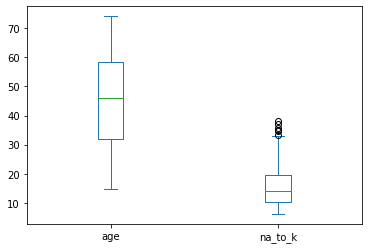

In [47]:
drugtrain.plot(kind='box')

In [48]:
# For training data
for c in nf_list:
    #print(c)    
    Q1 = drugtrain[c].quantile(0.25)
    Q3 = drugtrain[c].quantile(0.75)   
    IQR = Q3-Q1
    upper = Q3+1.5*IQR    
    lower = Q1-1.5*IQR
    print('Percentiles: 25th(Q1)=%.3f, 75th(Q3)=%.3f, IQR=%.3f' % (Q1, Q1, IQR))
    # Identify outliers
    outliers = [x for x in drugtrain[c] if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    #print(drugtrain[c])         
    drugtrain[c][drugtrain[c]>=upper]=upper
    drugtrain[c][drugtrain[c]<=lower]=lower

Percentiles: 25th(Q1)=32.000, 75th(Q3)=32.000, IQR=26.250
Identified outliers: 0
Percentiles: 25th(Q1)=10.445, 75th(Q3)=10.445, IQR=9.036
Identified outliers: 6


In [49]:
# for testing data
for c in nf_list:
    #print(c)    
    Q1 = drugtest[c].quantile(0.25)
    Q3 = drugtest[c].quantile(0.75)   
    IQR = Q3-Q1
    upper = Q3+1.5*IQR    
    lower = Q1-1.5*IQR
    print('Percentiles: 25th(Q1)=%.3f, 75th(Q3)=%.3f, IQR=%.3f' % (Q1, Q1, IQR))
    # Identify outliers
    outliers = [x for x in drugtest[c] if x < lower or x > upper]
    print('Identified outliers in : %d' % len(outliers))
    #print(drugtest[c])         
    drugtest[c][drugtest[c]>=upper]=upper
    drugtest[c][drugtest[c]<=lower]=lower

Percentiles: 25th(Q1)=24.500, 75th(Q3)=24.500, IQR=28.750
Identified outliers in : 0
Percentiles: 25th(Q1)=10.735, 75th(Q3)=10.735, IQR=8.365
Identified outliers in : 1


In [50]:
drugtrain1 = drugtrain.copy()
drugtest1 = drugtest.copy()

# Data Post Processing

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [53]:
drugtrain['drug'].value_counts(normalize=True)

drugY    0.47500
drugX    0.26875
drugA    0.10625
drugB    0.08125
drugC    0.06875
Name: drug, dtype: float64

In [54]:
drugtrain.head()

,age,sex,bp,cholesterol,na_to_k,drug
id,,,,,,
79,32,F,LOW,NORMAL,10.840,drugX
197,52,M,NORMAL,HIGH,9.894,drugX
38,39,F,NORMAL,NORMAL,9.709,drugX
24,33,F,LOW,HIGH,33.034,drugY
122,34,M,NORMAL,HIGH,22.456,drugY


In [55]:
cat_cols = ['sex', 'bp', 'cholesterol']

In [56]:
drugtrain_dummies = pd.get_dummies(drugtrain, columns=cat_cols, drop_first=True)

In [57]:
# For testing data
drugtest_dummies = pd.get_dummies(drugtest, columns=cat_cols, drop_first=True)

In [58]:
drugtrain_dummies.head()

,age,na_to_k,drug,sex_M,bp_LOW,bp_NORMAL,cholesterol_NORMAL
id,,,,,,,
79,32,10.840,drugX,0,1,0,1
197,52,9.894,drugX,1,0,1,0
38,39,9.709,drugX,0,0,1,1
24,33,33.034,drugY,0,1,0,0
122,34,22.456,drugY,1,0,1,0


In [59]:
## For testing data
drugtest_dummies.head()

,age,na_to_k,sex_M,bp_LOW,bp_NORMAL,cholesterol_NORMAL
id,,,,,,
95,36,11.424000,1,1,0,1
15,16,15.516000,0,0,0,1
30,18,8.750000,0,0,1,1
158,59,10.444000,0,1,0,0
128,47,31.648125,1,1,0,1


### Establishing coorelation between all the features using heatmap.

Text(0.5, 1.0, 'Correlation between features')

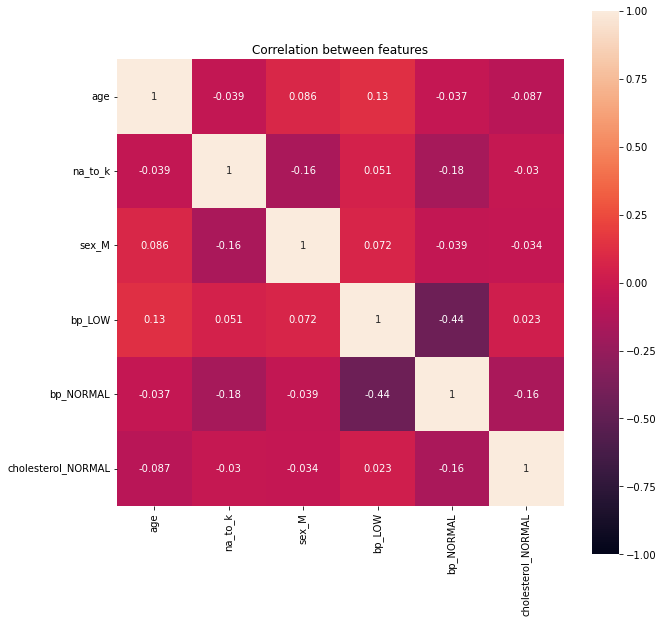

In [60]:
corr = drugtrain_dummies.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, square = True, annot = True,vmin=-1, vmax=1) #  vmin=-1, vmax=1
plt.title('Correlation between features')

- __Sex  negatively corelated with Drug.__
- __Age, Na to K, BP_low and BP_normal__ are __positively coorelated with Drug.__

##  Logistic Regression

- Logistic regression is a techinque used for solving the __classification problem__.<br/> And Classification is nothing but a problem of __identifing__ to which of a set of __categories__ a new observation belongs, on the basis of _training dataset_ containing observations (or instances) whose categorical membership is known.

In [61]:
drugtrain_dummies.columns

Index(['age', 'na_to_k', 'drug', 'sex_M', 'bp_LOW', 'bp_NORMAL',
       'cholesterol_NORMAL'],
      dtype='object')

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [63]:
features = ['age', 'na_to_k', 'sex_M', 'bp_LOW', 'bp_NORMAL', 'cholesterol_NORMAL']
target = ['drug']

In [64]:
X_train = drugtrain_dummies[features]
y_train = drugtrain_dummies[target]

In [65]:
X_test = drugtest_dummies[features]

In [66]:
numeric_features = X_train[['age', 'na_to_k']].columns
numeric_features

Index(['age', 'na_to_k'], dtype='object')

In [67]:
X_train[numeric_features] = sc.fit_transform(X_train[numeric_features])

In [68]:
X_test[numeric_features] = sc.fit_transform(X_test[numeric_features])

In [69]:
#logreg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')
logreg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
logreg.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

###  Using Trained Model for Prediction on testing data

In [70]:
X_train.shape

(160, 6)

In [71]:
X_test.shape

(40, 6)

In [72]:
y_pred_train = logreg.predict(X_train)
y_pred_train

array(['drugX', 'drugX', 'drugX', 'drugY', 'drugY', 'drugC', 'drugY',
       'drugY', 'drugB', 'drugX', 'drugX', 'drugY', 'drugX', 'drugY',
       'drugX', 'drugY', 'drugA', 'drugY', 'drugY', 'drugY', 'drugA',
       'drugY', 'drugB', 'drugY', 'drugX', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugB', 'drugX', 'drugX', 'drugX', 'drugB', 'drugA',
       'drugX', 'drugY', 'drugX', 'drugA', 'drugX', 'drugC', 'drugY',
       'drugA', 'drugA', 'drugA', 'drugY', 'drugB', 'drugA', 'drugY',
       'drugA', 'drugY', 'drugY', 'drugA', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugY', 'drugY', 'drugX', 'drugB',
       'drugX', 'drugY', 'drugA', 'drugC', 'drugY', 'drugX', 'drugX',
       'drugY', 'drugY', 'drugX', 'drugY', 'drugB', 'drugY', 'drugB',
       'drugX', 'drugY', 'drugY', 'drugY', 'drugB', 'drugC', 'drugA',
       'drugY', 'drugY', 'drugY', 'drugA', 'drugX', 'drugX', 'drugY',
       'drugC', 'drugY', 'drugY', 'drugX', 'drugA', 'drugX', 'drugX',
       'drugY', 'dru

In [73]:
y_pred_train.shape,y_train.shape

((160,), (160, 1))

# Model Evaluation

### using accuracy classification score

In [74]:
print('Accuracy score for test data is:', accuracy_score(y_train,y_pred_train))

Accuracy score for test data is: 0.95625


### using confusion matrix
A __confusion matrix__ is a __summary__ of prediction results on a classification problem.

The number of correct and incorrect predictions are summarized with count values and broken down by each class. <br/>
Below is a diagram showing a general confusion matrix.
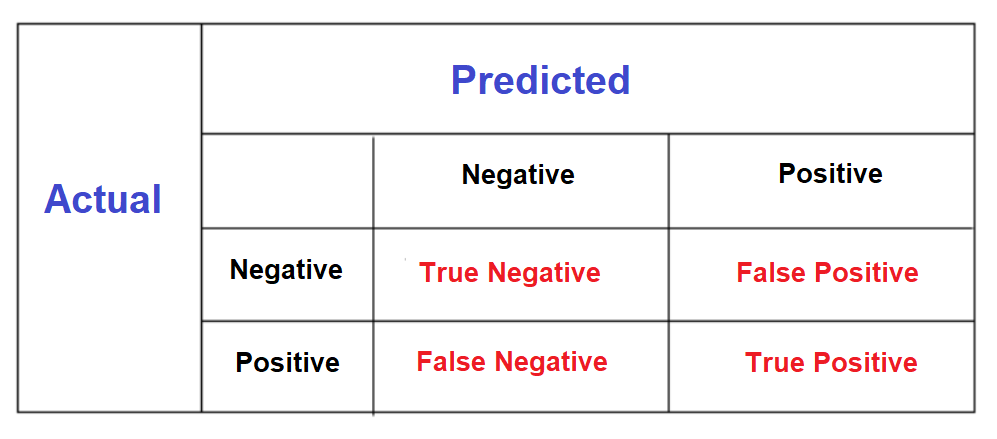

In [75]:
conf_matrix = confusion_matrix(y_train, y_pred_train)
print(conf_matrix)

[[16  0  0  0  1]
 [ 1 11  0  0  1]
 [ 0  0 11  0  0]
 [ 0  0  0 40  3]
 [ 0  1  0  0 75]]


In [76]:
## Classification Report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

       drugA       0.94      0.94      0.94        17
       drugB       0.92      0.85      0.88        13
       drugC       1.00      1.00      1.00        11
       drugX       1.00      0.93      0.96        43
       drugY       0.94      0.99      0.96        76

    accuracy                           0.96       160
   macro avg       0.96      0.94      0.95       160
weighted avg       0.96      0.96      0.96       160



In [77]:
#Classification Error: Overall, how often is the classifier incorrect?
#Also known as "Misclassification Rate"
#print((FP + FN) / (TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_train, y_pred_train))

0.043749999999999956


In [79]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier


In [80]:
SVM = svm.SVC(decision_function_shape="ovo").fit(X_train, y_train)
SVM.predict(X_train)
y_train_SVM = round(SVM.score(X_train, y_train), 4)
y_train_SVM

0.9875

In [83]:
RF = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0).fit(X_train, y_train)
RF.predict(X_train)
y_train_RF = round(RF.score(X_train, y_train), 4)
y_train_RF

1.0

In [84]:
y_pred_SVM = SVM.predict(X_train)
y_pred_SVM

array(['drugX', 'drugX', 'drugX', 'drugY', 'drugY', 'drugC', 'drugY',
       'drugY', 'drugY', 'drugX', 'drugX', 'drugY', 'drugX', 'drugY',
       'drugX', 'drugY', 'drugA', 'drugY', 'drugY', 'drugY', 'drugA',
       'drugY', 'drugB', 'drugY', 'drugX', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugB', 'drugX', 'drugX', 'drugX', 'drugB', 'drugA',
       'drugX', 'drugY', 'drugX', 'drugA', 'drugX', 'drugC', 'drugY',
       'drugA', 'drugA', 'drugA', 'drugB', 'drugB', 'drugA', 'drugY',
       'drugA', 'drugY', 'drugY', 'drugA', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugY', 'drugY', 'drugX', 'drugB',
       'drugX', 'drugY', 'drugA', 'drugC', 'drugY', 'drugX', 'drugX',
       'drugY', 'drugY', 'drugX', 'drugX', 'drugB', 'drugY', 'drugB',
       'drugX', 'drugY', 'drugY', 'drugY', 'drugB', 'drugC', 'drugA',
       'drugY', 'drugY', 'drugY', 'drugA', 'drugX', 'drugX', 'drugY',
       'drugC', 'drugY', 'drugY', 'drugX', 'drugA', 'drugX', 'drugX',
       'drugY', 'dru

In [85]:
y_pred_RF = RF.predict(X_train)
y_pred_RF

array(['drugX', 'drugX', 'drugX', 'drugY', 'drugY', 'drugC', 'drugY',
       'drugY', 'drugY', 'drugX', 'drugX', 'drugY', 'drugX', 'drugY',
       'drugX', 'drugY', 'drugA', 'drugY', 'drugY', 'drugY', 'drugA',
       'drugY', 'drugB', 'drugY', 'drugX', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugB', 'drugX', 'drugX', 'drugX', 'drugB', 'drugA',
       'drugX', 'drugY', 'drugX', 'drugA', 'drugX', 'drugC', 'drugY',
       'drugA', 'drugA', 'drugA', 'drugB', 'drugB', 'drugA', 'drugY',
       'drugA', 'drugY', 'drugY', 'drugA', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugY', 'drugY', 'drugX', 'drugB',
       'drugX', 'drugY', 'drugA', 'drugC', 'drugY', 'drugX', 'drugX',
       'drugY', 'drugY', 'drugX', 'drugX', 'drugB', 'drugY', 'drugB',
       'drugX', 'drugY', 'drugY', 'drugY', 'drugB', 'drugC', 'drugA',
       'drugY', 'drugY', 'drugY', 'drugA', 'drugX', 'drugX', 'drugY',
       'drugC', 'drugY', 'drugY', 'drugX', 'drugB', 'drugX', 'drugX',
       'drugY', 'dru

In [86]:
print("Logistic Regression", round(accuracy_score(y_train,y_pred_train),2))
print("Support Vector Machine", round(SVM.score(X_train, y_train),2))
print("Random Forest", round(RF.score(X_train, y_train),4))

Logistic Regression 0.96
Support Vector Machine 0.99
Random Forest 1.0


In [87]:
###  make predictions on the testing set
y_pred_test = logreg.predict(X_test)               

In [89]:
#Printing some sample values of prediction for test data
p_test = 'drug'
test_cols = X_test.columns.copy()
test_results = pd.DataFrame(data=X_test, columns=test_cols)
test_results[('Predicted on TEST data ' + p_test)]=y_pred_test
test_results.head(10)

,age,na_to_k,sex_M,bp_LOW,bp_NORMAL,cholesterol_NORMAL,Predicted on TEST data drug
id,,,,,,,
95,-0.229281,-0.598538,1,1,0,1,drugX
15,-1.368564,-0.011355,0,0,0,1,drugY
30,-1.254636,-0.982245,0,0,1,1,drugX
158,1.080895,-0.739164,0,1,0,0,drugC
128,0.397325,2.303534,1,1,0,1,drugY
115,0.625182,0.387420,1,0,0,0,drugY
69,-1.254636,1.245666,0,0,0,1,drugY
170,-0.684994,-0.389752,0,0,1,0,drugX
174,0.112504,-0.405967,1,0,0,1,drugY


In [90]:
# To create Dataframe of predicted value with particular respective index
predicted_drug = pd.DataFrame(y_pred_test) 
predicted_drug.index = X_test.index 
predicted_drug.columns = ["drug_prediction_test_data"]
# To download the csv file locally
#from google.colab import files
predicted_drug.to_csv('drug_project_submission_sagar.csv',header=False)
#files.download('cust_class_project_submission_sagar.csv')